In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
from sklearn import metrics
from sklearn import datasets
from sklearn import linear_model
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# perform feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# Hyperparameter Tuning
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint

In [3]:
bank_full_df = pd.read_csv ('bank-full.csv')

In [4]:
bank_full_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [5]:
bank_full_df.shape

(45211, 17)

In [6]:
bank_full_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# EXPLORATION AND PREPRATION

In [7]:
bank_full_df.isnull().values.any()

False

# Descriptive Statistics for Continous Variable

In [8]:
bank_full_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


# Descriptive Statistics for Catagorical Variables

In [9]:
bank_full_df.describe(include=["object"])

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [10]:
#list the categorical variables & continuous variables part of the dataset
categorical_variables=bank_full_df.describe(include=["object"]).columns
continuous_variables=bank_full_df.describe().columns

In [11]:
categorical_variables

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'Target'],
      dtype='object')

In [12]:
continuous_variables

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

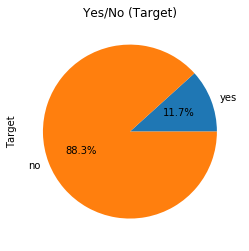

In [13]:
overall_fig=plt.figure(figsize=(6,4))
plt.title('Yes/No (Target)')
bank_full_df['Target'].value_counts(ascending=True).plot(kind='pie',autopct='%1.1f%%')

Dataset is imbalanced with majority of class label as "no". The percentage of representation is not equally distributed between 'Yes' & 'No', Average Response Rate is 11.7%.

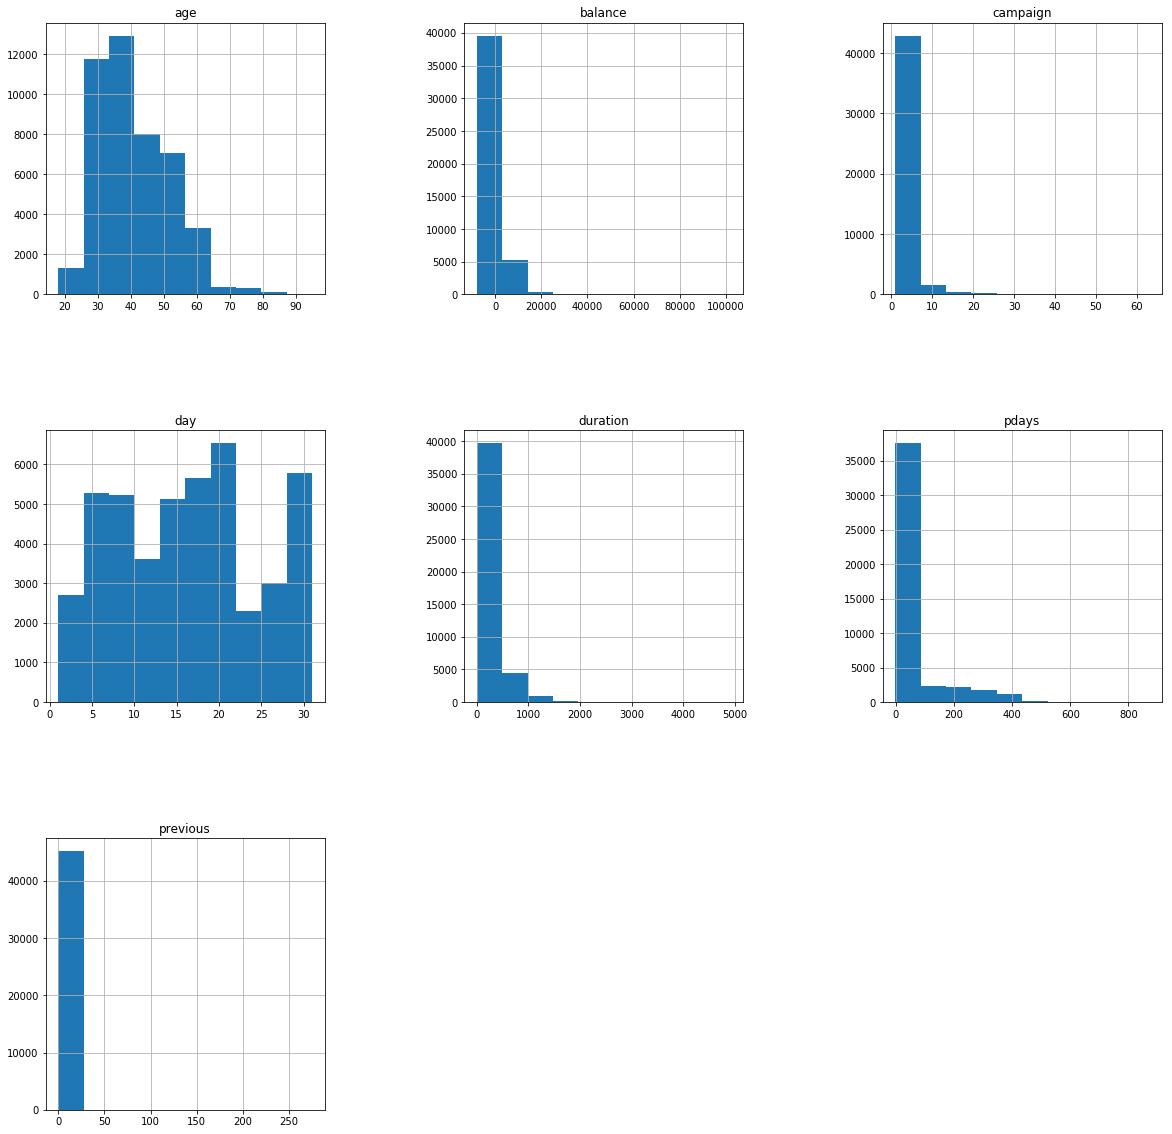

In [14]:
#num_list=list(bank_full_df.select_dtypes(exclude='object'))
bank_full_df.hist(column=continuous_variables,figsize=(20,20))
plt.subplots_adjust (wspace=0.5, hspace=0.5)
plt.show()

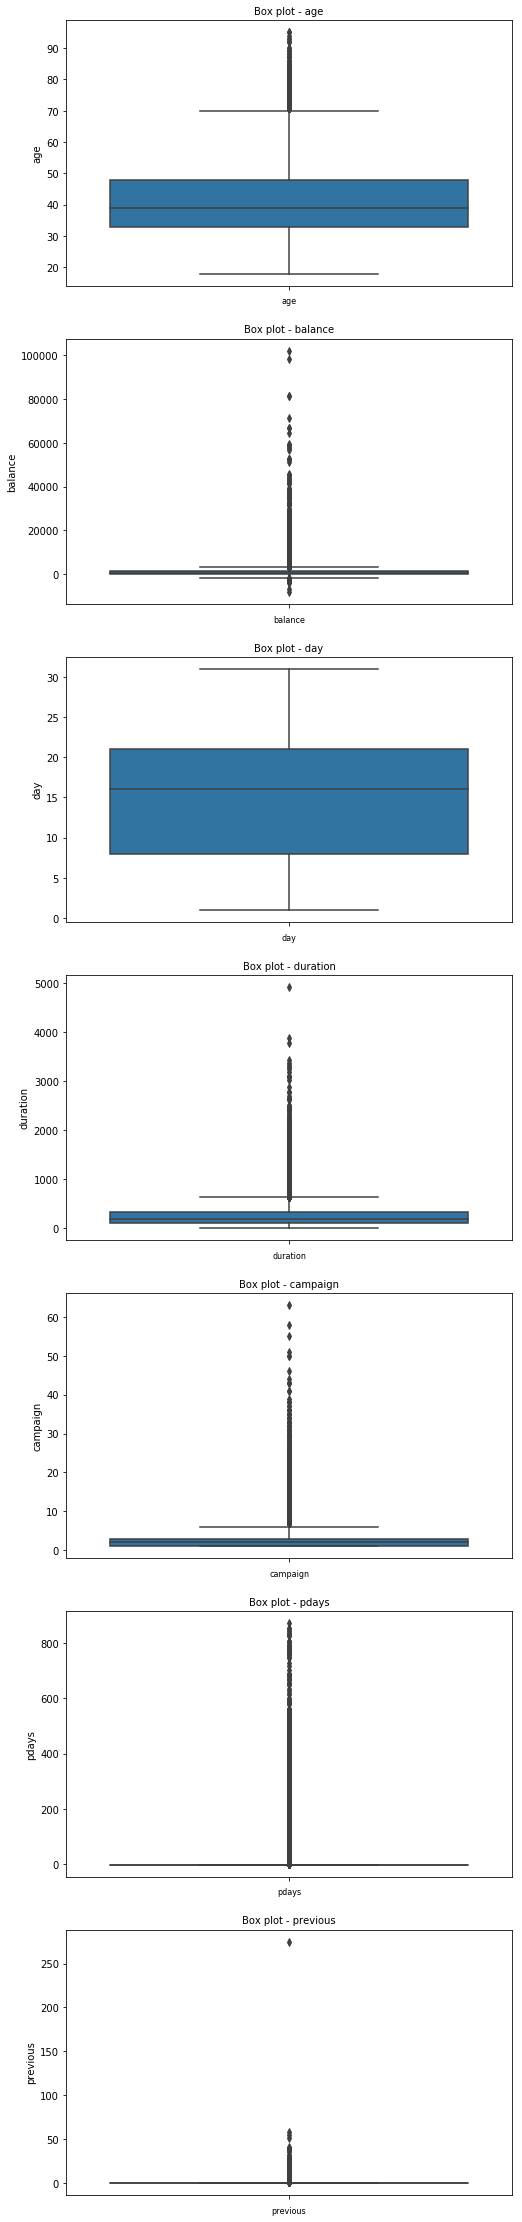

In [15]:
fig, ax = plt.subplots(len(continuous_variables), figsize=(8,40))

for i, col_val in enumerate(continuous_variables):

    sns.boxplot(y=bank_full_df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

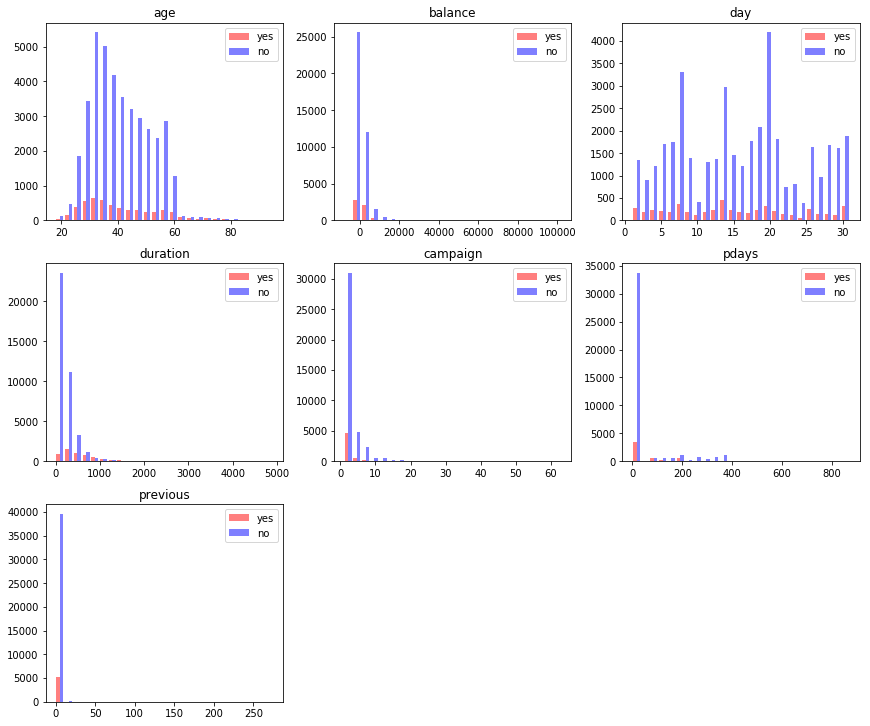

In [16]:
plt.figure(figsize=(12,10))
def response_yes_no(feature_name):
    response_yes=bank_full_df[bank_full_df['Target']=='yes'][feature_name]
    response_no=bank_full_df[bank_full_df['Target']=='no'][feature_name]
    return response_yes, response_no
for num, feature_name in enumerate(continuous_variables):
    #print(num, feature_name)
    plt.subplot(3,3,num+1)
    plt.hist((response_yes_no(feature_name)[0], response_yes_no(feature_name)[1]), bins=25, alpha=0.5, label=['yes', 'no'], color=['r', 'b'])
    plt.legend(loc='upper right')
    plt.title(feature_name)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    

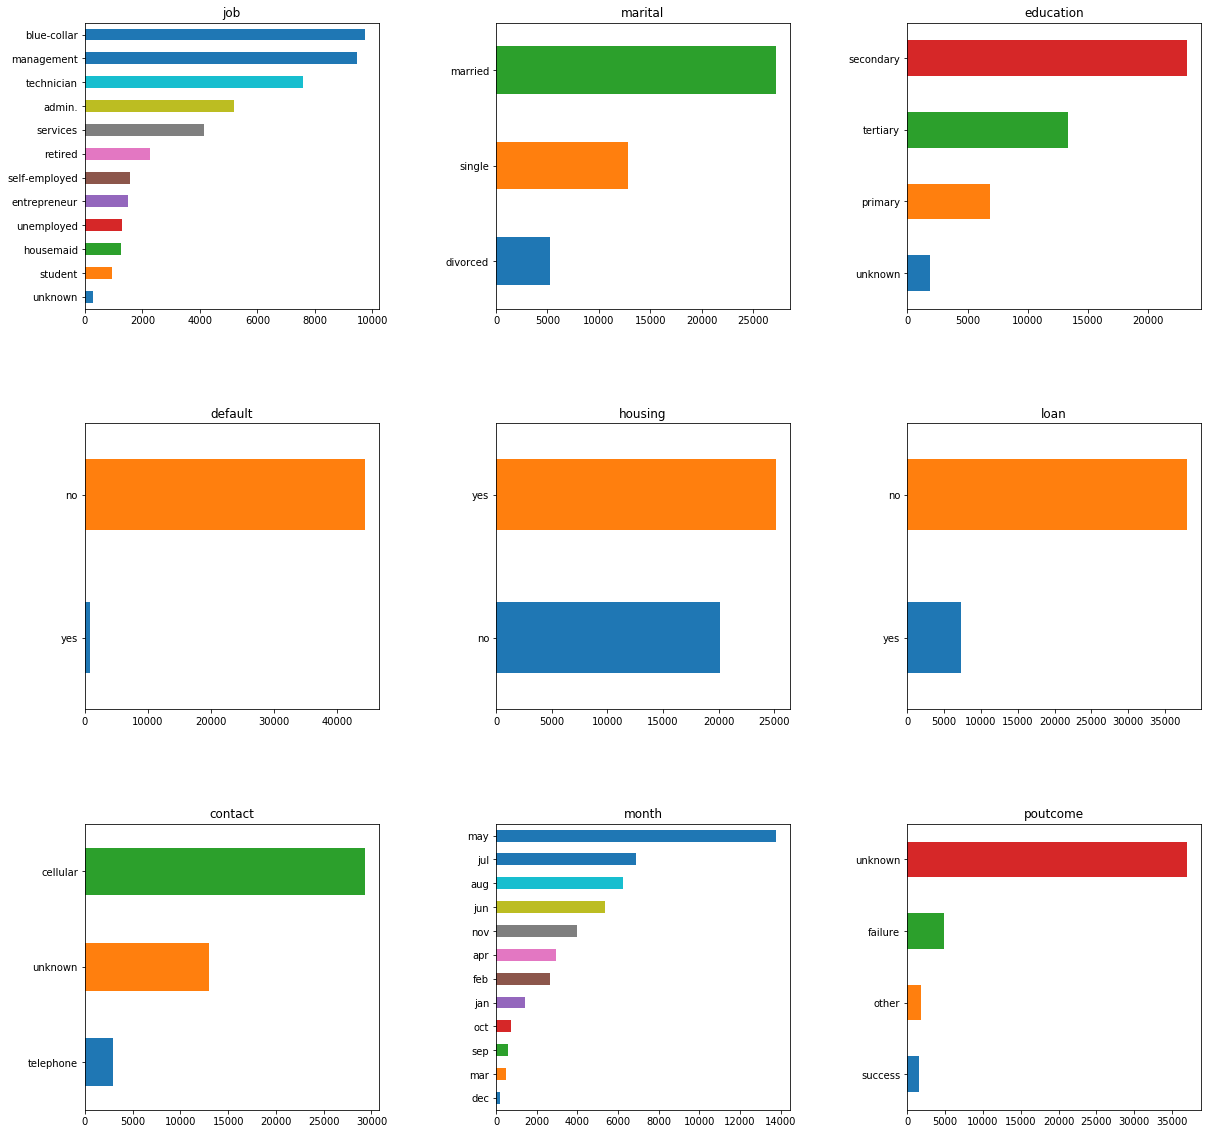

In [17]:
fig=plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,len(categorical_variables)):
    ax=fig.add_subplot(3,3,i)
    bank_full_df[categorical_variables[i-1]].value_counts(ascending=True).plot("barh").set_title(categorical_variables[i-1])

# Normalized Relative Frequency of the target per category

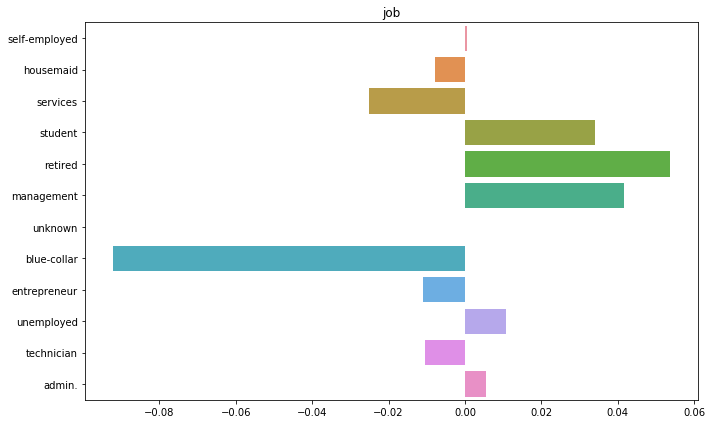

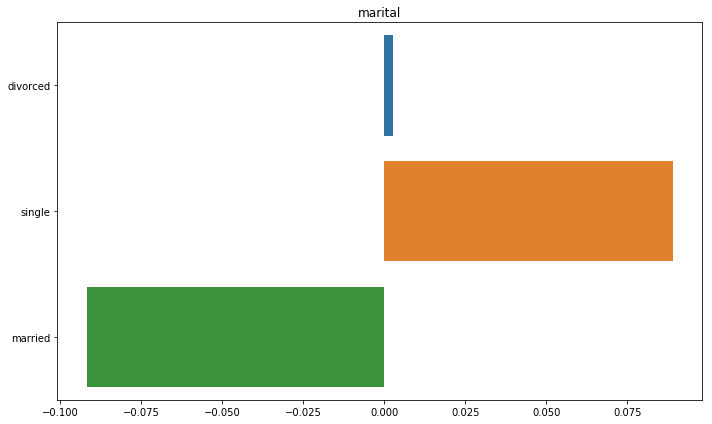

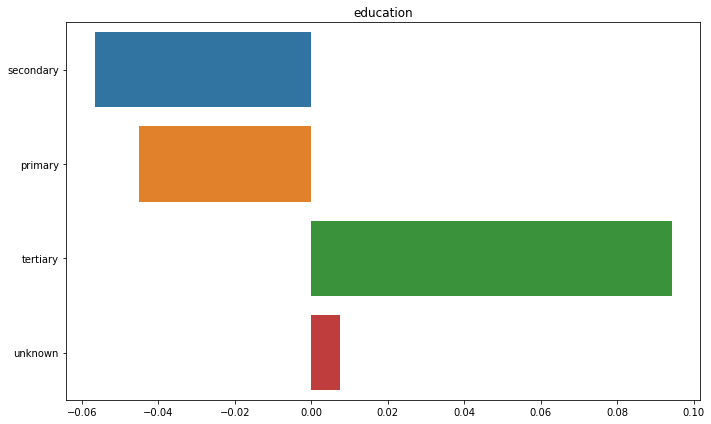

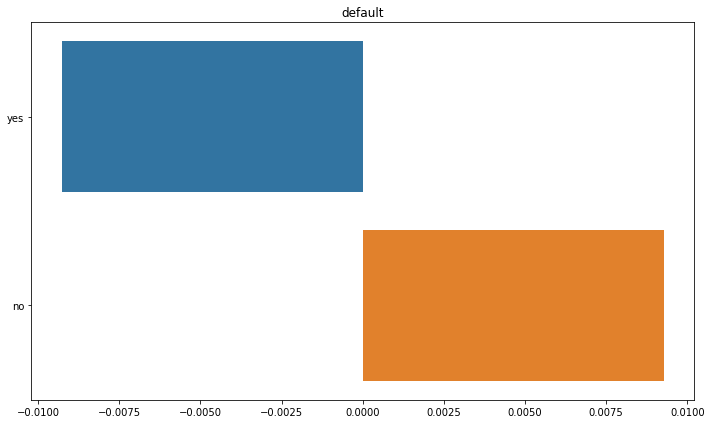

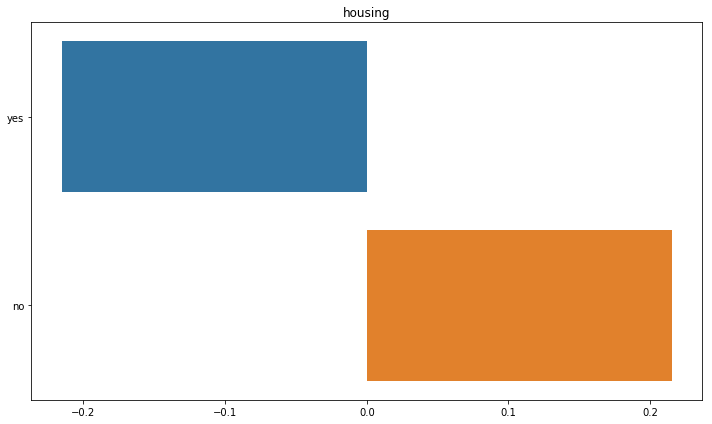

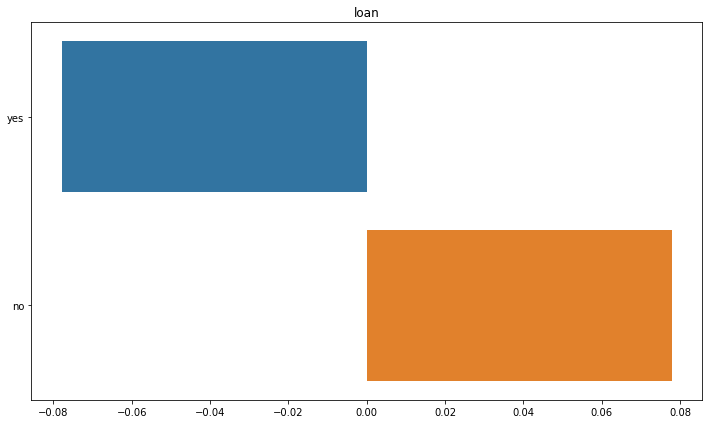

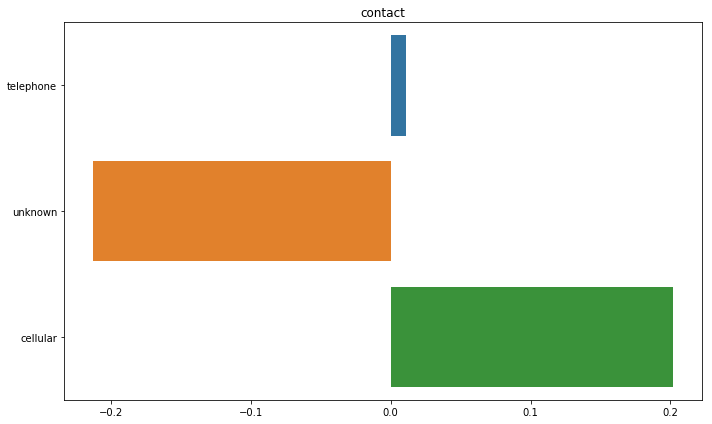

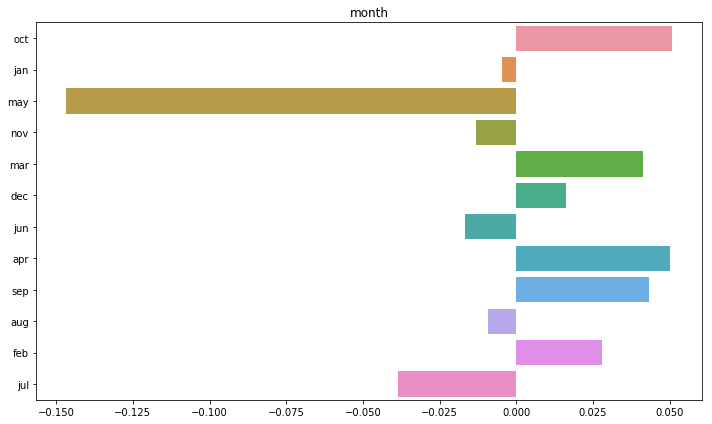

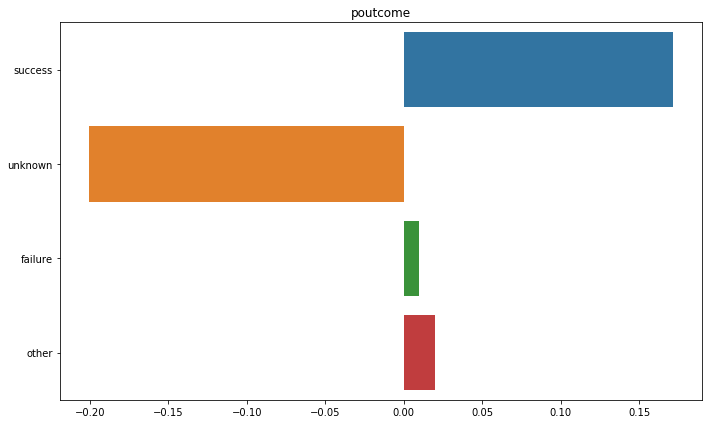

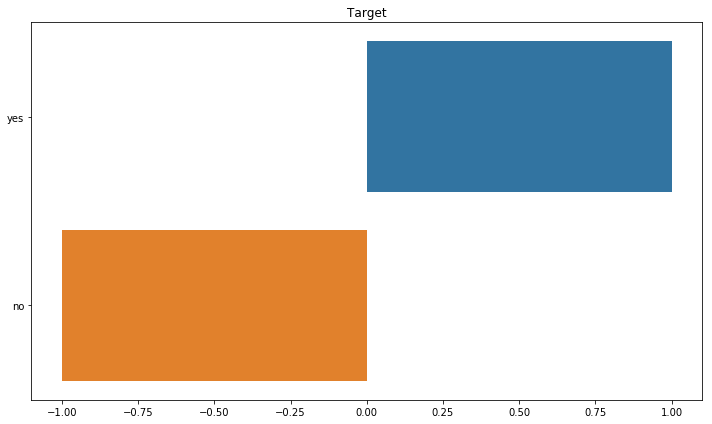

In [18]:
for column in categorical_variables:
    plt.figure(figsize=(10,6))
    #Returns counts of unique values for each outcome for each feature.
    response_positive=bank_full_df.loc[bank_full_df.Target.values=='yes', column].value_counts()
    response_negative=bank_full_df.loc[bank_full_df.Target.values=='no', column].value_counts()
    
    response_values=list(set(list(response_positive.index)+list(response_negative.index)))
    
    response_freuency_positive=(bank_full_df.Target.values=='yes').sum()
    response_freuency_negative=(bank_full_df.Target.values=='no').sum()
    
    response_positive_counts=response_positive.to_dict()
    response_negative_counts=response_negative.to_dict()
    
    response_index=list(response_values)
    response_values=[response_positive.get(response_value,0)/response_freuency_positive - response_negative.get(response_value,0)/response_freuency_negative for response_value in response_values]
    
    sns.barplot(response_values, response_index)
    plt.title(column)
    plt.tight_layout()

In [19]:
pd.crosstab(bank_full_df['job'], bank_full_df['education'])

education,primary,secondary,tertiary,unknown
job,,,,
admin.,209,4219,572,171
blue-collar,3758,5371,149,454
entrepreneur,183,542,686,76
housemaid,627,395,173,45
management,294,1121,7801,242
retired,795,984,366,119
self-employed,130,577,833,39
services,345,3457,202,150
student,44,508,223,163


In [20]:
print ("\n--------- Replacing unknowns in feature --------- ",'education')
for category in bank_full_df['job'].unique():
    feature_value_counts = bank_full_df.loc[(bank_full_df['job']==category),'education'].value_counts()
    print ("Replaced with: ",category, feature_value_counts.idxmax())
    bank_full_df.loc[(bank_full_df['education']=='unknown') & (bank_full_df['job']==category), 'education']=feature_value_counts.idxmax()


--------- Replacing unknowns in feature ---------  education
Replaced with:  management tertiary
Replaced with:  technician secondary
Replaced with:  entrepreneur tertiary
Replaced with:  blue-collar secondary
Replaced with:  unknown unknown
Replaced with:  retired secondary
Replaced with:  admin. secondary
Replaced with:  services secondary
Replaced with:  self-employed tertiary
Replaced with:  unemployed secondary
Replaced with:  housemaid primary
Replaced with:  student secondary


In [21]:
pd.crosstab(bank_full_df['job'], bank_full_df['poutcome'])

poutcome,failure,other,success,unknown
job,,,,
admin.,643,241,204,4083
blue-collar,1068,401,148,8115
entrepreneur,164,39,22,1262
housemaid,97,26,29,1088
management,1044,393,387,7634
retired,230,83,174,1777
self-employed,165,61,55,1298
services,444,177,85,3448
student,117,81,87,653


In [22]:
pd.crosstab(bank_full_df['education'], bank_full_df['poutcome'])

poutcome,failure,other,success,unknown
education,,,,
primary,645,247,134,5870
secondary,2719,1034,723,20054
tertiary,1532,558,649,10919
unknown,5,1,5,116


In [23]:
bank_full_df['age_by_decades']=pd.cut(x=bank_full_df['age'], bins=[10,19,29,39,49,59,69,79,89,99], labels=['<20', '20s','30s','40s','50s','60s','70s','80s','90s'])
pd.crosstab(bank_full_df['age_by_decades'], bank_full_df['poutcome'])

poutcome,failure,other,success,unknown
age_by_decades,,,,
<20,3,4,7,33
20s,455,264,243,4264
30s,2181,815,524,14569
40s,1232,417,292,9714
50s,812,246,216,7136
60s,136,57,140,897
70s,68,26,69,261
80s,14,11,17,79
90s,0,0,3,6


In [24]:
print ("\n--------- Replacing unknowns in feature --------- ",'poutcome')
for category in bank_full_df['age_by_decades'].unique():
    feature_value_counts = bank_full_df.loc[(bank_full_df['age_by_decades']==category) & (bank_full_df['poutcome']!='unknown'),'poutcome'].value_counts()
    print ("Replaced with: ",category, feature_value_counts.idxmax())
    bank_full_df.loc[(bank_full_df['poutcome']=='unknown') & (bank_full_df['age_by_decades']==category), 'poutcome']=feature_value_counts.idxmax()


--------- Replacing unknowns in feature ---------  poutcome
Replaced with:  50s failure
Replaced with:  40s failure
Replaced with:  30s failure
Replaced with:  20s failure
Replaced with:  60s success
Replaced with:  80s success
Replaced with:  70s success
Replaced with:  <20 success
Replaced with:  90s success


In [25]:
pd.crosstab(bank_full_df['job'], bank_full_df['contact'])

contact,cellular,telephone,unknown
job,,,
admin.,3354,289,1528
blue-collar,5156,611,3965
entrepreneur,954,87,446
housemaid,748,151,341
management,7021,471,1966
retired,1370,405,489
self-employed,1084,98,397
services,2498,228,1428
student,697,99,142


In [26]:
pd.crosstab(bank_full_df['education'], bank_full_df['contact'])

contact,cellular,telephone,unknown
education,,,
primary,3589,732,2575
secondary,15401,1495,7634
tertiary,10246,655,2757
unknown,49,24,54


In [27]:
print ("\n--------- Replacing unknowns in feature --------- ",'education')
for category in bank_full_df['education'].unique():
    feature_value_counts = bank_full_df.loc[(bank_full_df['education']==category),'contact'].value_counts()
    print ("Replaced with: ",category, feature_value_counts.idxmax())
    bank_full_df.loc[(bank_full_df['contact']=='unknown') & (bank_full_df['education']==category), 'contact']=feature_value_counts.idxmax()


--------- Replacing unknowns in feature ---------  education
Replaced with:  tertiary cellular
Replaced with:  secondary cellular
Replaced with:  unknown unknown
Replaced with:  primary cellular


In [28]:
bank_full_df['pdays']=np.where(bank_full_df['pdays']==-1,bank_full_df[bank_full_df['pdays']>-1]['pdays'].mean(), bank_full_df['pdays'])

In [29]:
bank_full_df['default'].replace({'no':0,'yes':1},inplace=True)
bank_full_df['housing'].replace({'no':0,'yes':1},inplace=True)
bank_full_df['loan'].replace({'no':0,'yes':1},inplace=True)
bank_full_df['Target'].replace({'no':0,'yes':1},inplace=True)

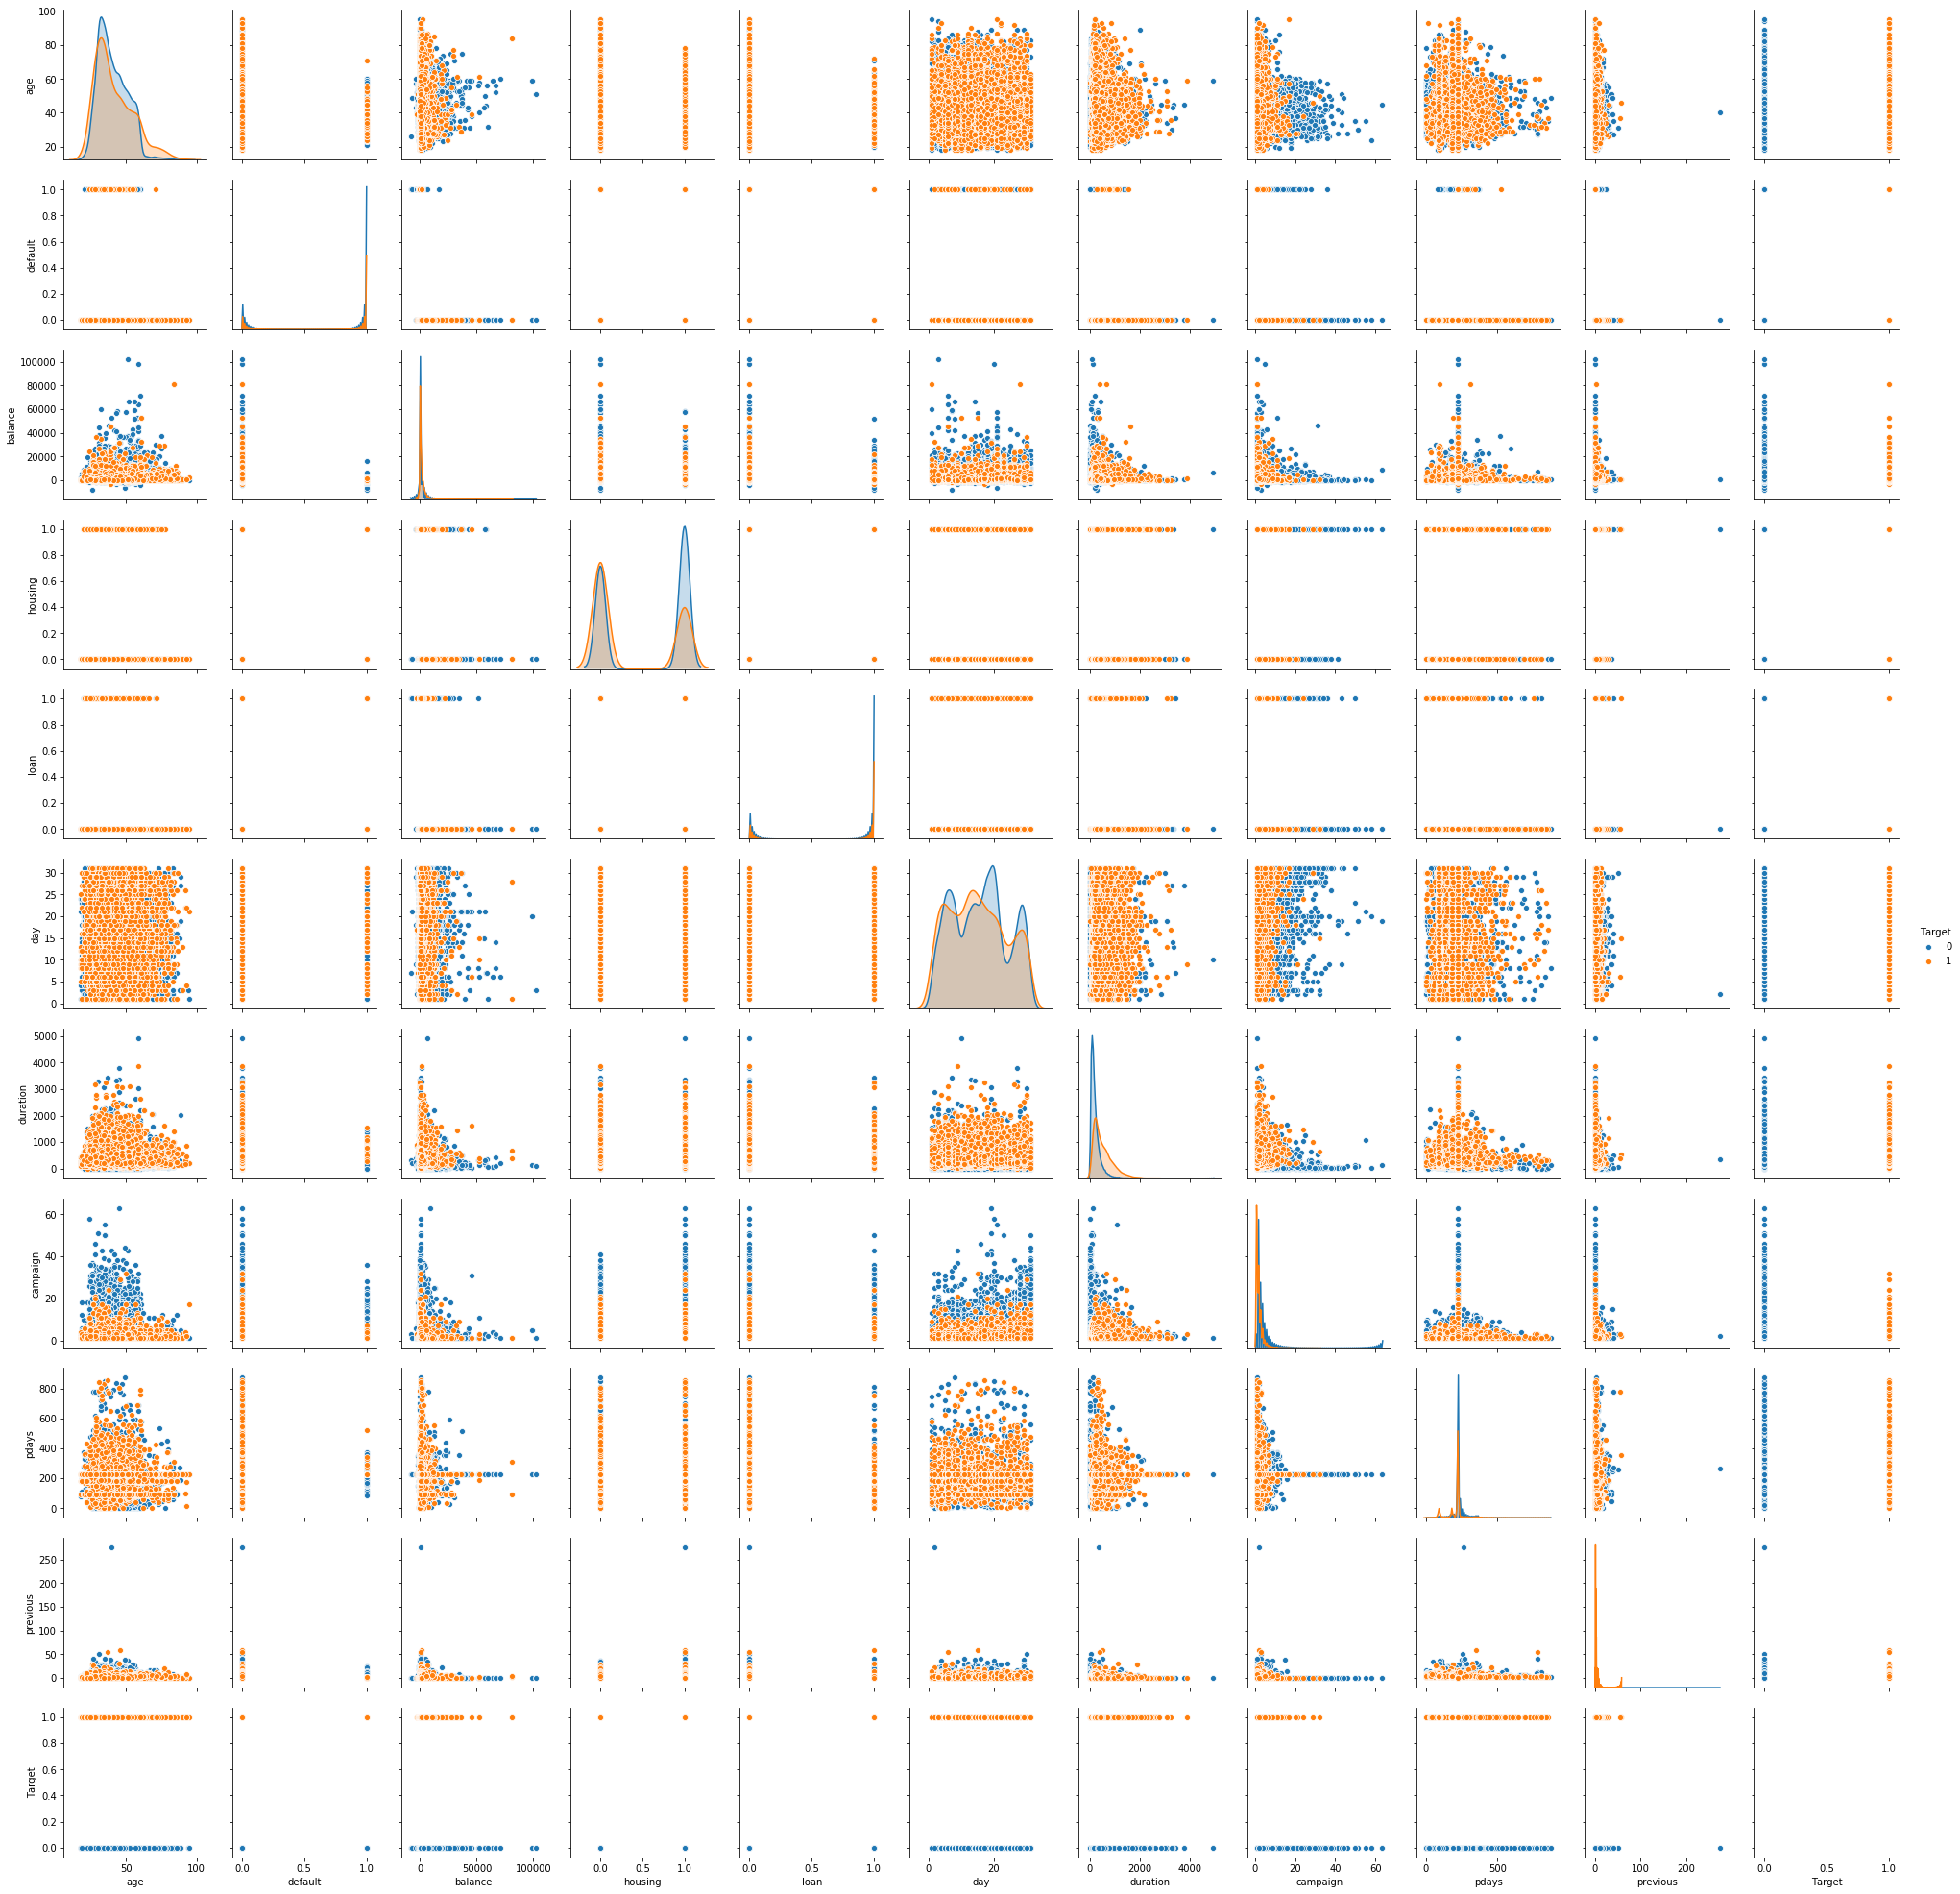

In [30]:
sns.pairplot(bank_full_df, hue = "Target")

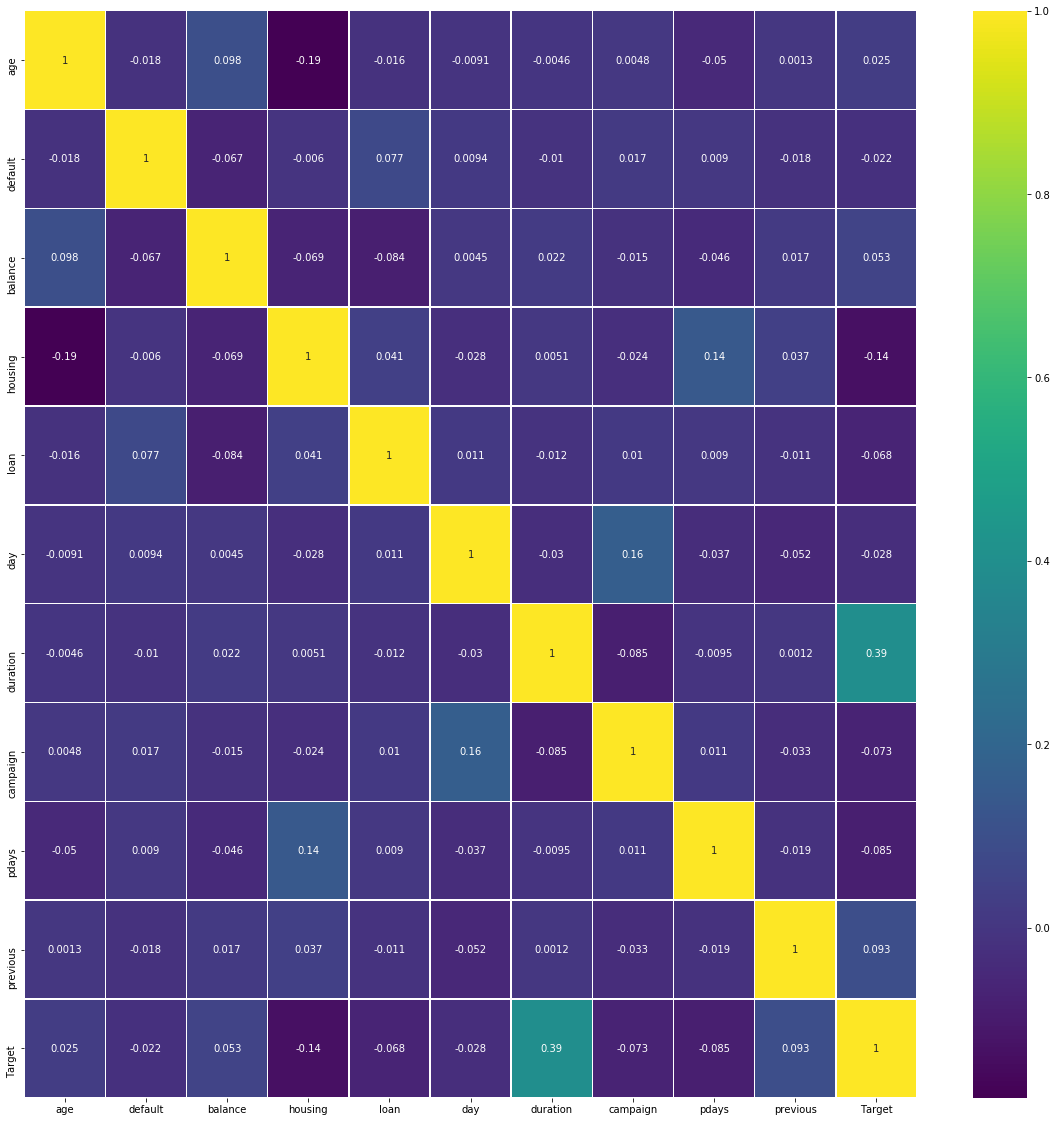

In [31]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(bank_full_df.corr(), annot=True,cmap='viridis',linewidths=0.5,ax=ax)

In [32]:
bank_full_df['duration']=bank_full_df['duration'].apply(lambda n:n/60).round(2)

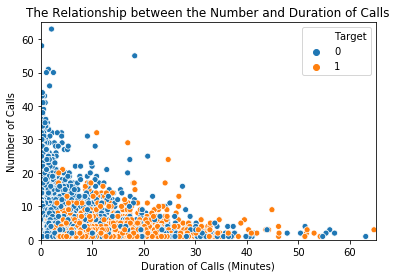

In [33]:
duration_campaign = sns.scatterplot(x='duration', y='campaign', data=bank_full_df,hue='Target')
plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls')
# Annotation
plt.show()

In [34]:
bank_full_df[bank_full_df.duration < 10/60]['duration'].count()

342

In [35]:
#dropping records less than 10
bank_full_df = bank_full_df.drop(bank_full_df[bank_full_df.duration < 10/60].index, axis = 0, inplace = False)

# Scale or Normalize as required for Bank Full Dataset

In [36]:
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

bank_full_df[continuous_variables] = scaler.fit_transform(bank_full_df[continuous_variables])

In [37]:
bank_full_df_new = pd.get_dummies(bank_full_df)
bank_full_df_new = bank_full_df_new.drop('duration', axis=1)

In [38]:
bank_full_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44869 entries, 0 to 45210
Data columns (total 56 columns):
age                    44869 non-null float64
default                44869 non-null int64
balance                44869 non-null float64
housing                44869 non-null int64
loan                   44869 non-null int64
day                    44869 non-null float64
campaign               44869 non-null float64
pdays                  44869 non-null float64
previous               44869 non-null float64
Target                 44869 non-null int64
job_admin.             44869 non-null uint8
job_blue-collar        44869 non-null uint8
job_entrepreneur       44869 non-null uint8
job_housemaid          44869 non-null uint8
job_management         44869 non-null uint8
job_retired            44869 non-null uint8
job_self-employed      44869 non-null uint8
job_services           44869 non-null uint8
job_student            44869 non-null uint8
job_technician         44869 non-null uint8

In [39]:
bank_full_df_new.shape

(44869, 56)

In [40]:
bank_full_df_new.head()

,age,default,balance,housing,loan,day,campaign,pdays,previous,Target,...,poutcome_success,age_by_decades_<20,age_by_decades_20s,age_by_decades_30s,age_by_decades_40s,age_by_decades_50s,age_by_decades_60s,age_by_decades_70s,age_by_decades_80s,age_by_decades_90s
0,0.519481,0,0.092259,1,0,0.133333,0.0,0.256986,0.0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.337662,0,0.073067,1,0,0.133333,0.0,0.256986,0.0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.194805,0,0.072822,1,1,0.133333,0.0,0.256986,0.0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.376623,0,0.086476,1,0,0.133333,0.0,0.256986,0.0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.194805,0,0.072812,0,0,0.133333,0.0,0.256986,0.0,0,...,0,0,0,1,0,0,0,0,0,0


In [41]:
#split the dataset into 70:30 for Train:Test
train_set, test_set=train_test_split(bank_full_df_new, test_size=0.3, random_state=10)
train_labels= train_set.pop('Target')
test_labels=test_set.pop('Target')

In [42]:
def draw_cm(algorithm_name, actual_labels, predicted_labels):
    cnf_matrix = metrics.confusion_matrix(actual_labels, predicted_labels)
    accuracy   = accuracy_score (actual_labels, predicted_labels)
    precision  = precision_score(actual_labels, predicted_labels)
    f1score    = f1_score(actual_labels, predicted_labels)
    recall     = recall_score(actual_labels, predicted_labels)
    print("Confusion Matrix for %s:\n"%(algorithm_name),cnf_matrix)
    print("Accuracy of %s is: %f"%(algorithm_name, accuracy))
    print("Precision of %s is: %f"%(algorithm_name,precision))
    print("Recall of %s is: %f"%(algorithm_name,recall))
    print("F1 Score of %s is: %f"%(algorithm_name,f1score))

In [47]:
#Models using standard classification algorithm and ensemble models to compare the results 

# Logistic Regression

In [48]:
lr_model=LogisticRegression()
lr_model.fit(train_set,train_labels)
lr_predicted=lr_model.predict(test_set)
draw_cm('Logistic Regression ', test_labels,lr_predicted)

Confusion Matrix for Logistic Regression :
 [[11723   173]
 [ 1302   263]]
Accuracy of Logistic Regression  is: 0.890424
Precision of Logistic Regression  is: 0.603211
Recall of Logistic Regression  is: 0.168051
F1 Score of Logistic Regression  is: 0.262869


# NaiveBayes Classifier

In [49]:
nb_model=GaussianNB()
nb_model.fit(train_set,train_labels)
nb_predicted=nb_model.predict(test_set)
draw_cm('Naive Bayes Classifier ', test_labels,nb_predicted)

Confusion Matrix for Naive Bayes Classifier :
 [[10844  1052]
 [  895   670]]
Accuracy of Naive Bayes Classifier  is: 0.855360
Precision of Naive Bayes Classifier  is: 0.389082
Recall of Naive Bayes Classifier  is: 0.428115
F1 Score of Naive Bayes Classifier  is: 0.407667


# Decision Tree Classifiers

In [50]:
dt_model=DecisionTreeClassifier(criterion="entropy")
dt_model.fit(train_set,train_labels)
dt_predicted=dt_model.predict(test_set)
draw_cm('Decision Tree Classifier ', test_labels,dt_predicted)

Confusion Matrix for Decision Tree Classifier :
 [[10657  1239]
 [ 1081   484]]
Accuracy of Decision Tree Classifier  is: 0.827650
Precision of Decision Tree Classifier  is: 0.280905
Recall of Decision Tree Classifier  is: 0.309265
F1 Score of Decision Tree Classifier  is: 0.294404


# BaggingClassifier

In [51]:

bgcl = BaggingClassifier()
bgcl = bgcl.fit(train_set, train_labels)
test_pred = bgcl.predict(test_set)
bgcl.score(test_set , test_labels)
draw_cm('BaggingClassifier', test_labels, test_pred)

Confusion Matrix for BaggingClassifier:
 [[11609   287]
 [ 1227   338]]
Accuracy of BaggingClassifier is: 0.887527
Precision of BaggingClassifier is: 0.540800
Recall of BaggingClassifier is: 0.215974
F1 Score of BaggingClassifier is: 0.308676


# RandomForestClassifier

In [52]:
rfcl = RandomForestClassifier(criterion = 'entropy')
rfcl = rfcl.fit(train_set, train_labels)
test_pred = rfcl.predict(test_set)
rfcl.score(test_set , test_labels)
draw_cm('RandomForestClassifier', test_labels, test_pred)

Confusion Matrix for RandomForestClassifier:
 [[11651   245]
 [ 1254   311]]
Accuracy of RandomForestClassifier is: 0.888641
Precision of RandomForestClassifier is: 0.559353
Recall of RandomForestClassifier is: 0.198722
F1 Score of RandomForestClassifier is: 0.293258


# AdaBoostClassifier

In [53]:
abcl = AdaBoostClassifier()
abcl = abcl.fit(train_set, train_labels)

test_pred = abcl.predict(test_set)
abcl.score(test_set , test_labels)
draw_cm('AdaBoostClassifier', test_labels, test_pred)

Confusion Matrix for AdaBoostClassifier:
 [[11700   196]
 [ 1274   291]]
Accuracy of AdaBoostClassifier is: 0.890796
Precision of AdaBoostClassifier is: 0.597536
Recall of AdaBoostClassifier is: 0.185942
F1 Score of AdaBoostClassifier is: 0.283626


# GradientBoostingClassifier

In [54]:
gbcl = GradientBoostingClassifier()
gbcl = gbcl.fit(train_set, train_labels)
test_pred = gbcl.predict(test_set)
gbcl.score(test_set , test_labels)
draw_cm('GradientBoostingClassifier', test_labels, test_pred)

Confusion Matrix for GradientBoostingClassifier:
 [[11722   174]
 [ 1232   333]]
Accuracy of GradientBoostingClassifier is: 0.895550
Precision of GradientBoostingClassifier is: 0.656805
Recall of GradientBoostingClassifier is: 0.212780
F1 Score of GradientBoostingClassifier is: 0.321429


# Comparing the Classifiers for accuracy

In [55]:
models=[]
models.append(('LogisticRegression',LogisticRegression()))
models.append(('Naive Bayes ' ,GaussianNB()))
models.append(('DecisionTreeClassifier ' ,DecisionTreeClassifier()))
models.append(('BaggingClassifier ' ,BaggingClassifier()))
models.append(('RandomForestClassifier ' ,RandomForestClassifier()))
models.append(('AdaBoostClassifier ' ,AdaBoostClassifier()))
models.append(('GradientBoostingClassifier ' ,GradientBoostingClassifier()))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=1)
    cv_results = model_selection.cross_val_score(model, train_set, train_labels, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LogisticRegression: 0.887640 (0.006590)
Naive Bayes : 0.847587 (0.015542)
DecisionTreeClassifier : 0.825777 (0.006237)
BaggingClassifier : 0.886558 (0.007330)
RandomForestClassifier : 0.887163 (0.006527)
AdaBoostClassifier : 0.889200 (0.005902)
GradientBoostingClassifier : 0.891206 (0.006000)


# L1 Regularization of LogisticRegression

In [56]:
reg_lr1_model=LogisticRegression(penalty='l1',max_iter=100)
reg_lr1_model.fit(train_set,train_labels)
reg_lr1_predicted=reg_lr1_model.predict(test_set)
draw_cm('Regularized Logistic Regression - Lasso Regression',test_labels,reg_lr1_predicted)

Confusion Matrix for Regularized Logistic Regression - Lasso Regression:
 [[11729   167]
 [ 1304   261]]
Accuracy of Regularized Logistic Regression - Lasso Regression is: 0.890721
Precision of Regularized Logistic Regression - Lasso Regression is: 0.609813
Recall of Regularized Logistic Regression - Lasso Regression is: 0.166773
F1 Score of Regularized Logistic Regression - Lasso Regression is: 0.261917


# L2 Regularization of LogisticRegression

In [57]:
reg_lr2_model=LogisticRegression(penalty='l2',max_iter=100)
reg_lr2_model.fit(train_set,train_labels)
reg_lr2_predicted=reg_lr2_model.predict(test_set)
draw_cm('Regularized Logistic Regression - Ridge Regression',test_labels,reg_lr2_predicted)

Confusion Matrix for Regularized Logistic Regression - Ridge Regression:
 [[11723   173]
 [ 1302   263]]
Accuracy of Regularized Logistic Regression - Ridge Regression is: 0.890424
Precision of Regularized Logistic Regression - Ridge Regression is: 0.603211
Recall of Regularized Logistic Regression - Ridge Regression is: 0.168051
F1 Score of Regularized Logistic Regression - Ridge Regression is: 0.262869


# Regularizing the DecisionTree

In [58]:
reg_dt_model= DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf=15)
reg_dt_model.fit(train_set, train_labels)
reg_dt_predicted=reg_dt_model.predict(test_set)
draw_cm('Regularized DecisionTree ', test_labels,reg_dt_predicted)

Confusion Matrix for Regularized DecisionTree :
 [[11675   221]
 [ 1201   364]]
Accuracy of Regularized DecisionTree  is: 0.894361
Precision of Regularized DecisionTree  is: 0.622222
Recall of Regularized DecisionTree  is: 0.232588
F1 Score of Regularized DecisionTree  is: 0.338605


# Hyper-Parameter Tuning

In [66]:
grid = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = grid)
gsearch1.fit(train_set,train_labels)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(20, 81, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [67]:
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 30}, 0.8920975547631177)

In [68]:
dt_grid={'criterion': ['gini', 'entropy'], 'max_depth':range(5,16,2),'min_samples_leaf':range(15,100,5)}
dt_search1=GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = dt_grid)
dt_search1.fit(train_set,train_labels)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(5, 16, 2), 'min_samples_leaf': range(15, 100, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [69]:
dt_search1.best_params_, dt_search1.best_score_

({'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 90},
 0.8913652572592969)

In [70]:
rf_grid={'criterion': ['gini', 'entropy'], 'max_depth':range(5,16,2),'min_samples_leaf':range(15,100,5)}
rf_search1=GridSearchCV(estimator = RandomForestClassifier(), param_grid = rf_grid)
rf_search1.fit(train_set,train_labels)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(5, 16, 2), 'min_samples_leaf': range(15, 100, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [71]:
rf_search1.best_params_, rf_search1.best_score_

({'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 15},
 0.8917791645440653)

In [72]:
bg_grid={'n_estimators':range(20,81,10)}
bg_search1=GridSearchCV(estimator = BaggingClassifier(), param_grid = bg_grid)
bg_search1.fit(train_set,train_labels)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(20, 81, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [73]:
bg_search1.best_params_, bg_search1.best_score_

({'n_estimators': 80}, 0.8899006622516556)

In [74]:
ab_grid={'n_estimators':range(20,81,10)}
ab_search1=GridSearchCV(estimator = AdaBoostClassifier(), param_grid = ab_grid)
ab_search1.fit(train_set,train_labels)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(20, 81, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [75]:
ab_search1.best_params_, ab_search1.best_score_

({'n_estimators': 50}, 0.8898051451859399)

In [76]:
models=[]
models.append(('LogisticRegression-Lasso',LogisticRegression(penalty='l1',max_iter=100)))
models.append(('LogisticRegression-Ridge',LogisticRegression(penalty='l2',max_iter=100)))
models.append(('DecisionTreeClassifier ' ,DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf=90)))
models.append(('BaggingClassifier ' ,BaggingClassifier(base_estimator=reg_dt_model, n_estimators=80)))
models.append(('RandomForestClassifier ' ,RandomForestClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf=15)))
models.append(('AdaBoostClassifier ' ,AdaBoostClassifier(base_estimator=reg_dt_model, n_estimators=50)))
models.append(('GradientBoostingClassifier ' ,GradientBoostingClassifier(n_estimators=30)))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=1)
    cv_results = model_selection.cross_val_score(model, train_set, train_labels, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()*2)
    print(msg)

LogisticRegression-Lasso: 0.887768 (0.013661)
LogisticRegression-Ridge: 0.887640 (0.013181)
DecisionTreeClassifier : 0.890251 (0.013413)
BaggingClassifier : 0.891970 (0.012826)
RandomForestClassifier : 0.887577 (0.014714)
AdaBoostClassifier : 0.880508 (0.011058)
GradientBoostingClassifier : 0.892607 (0.013972)
